<a href="https://colab.research.google.com/github/Swati-Yadv/CN_lab/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the Data from Kaggle

In [3]:
!pip install opendatasets --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swatiyadav11
Your Kaggle Key: ··········


100%|██████████| 242M/242M [00:01<00:00, 136MB/s]


# Reading the Data


In [5]:
import pandas as pd
df = pd.read_csv("amazon-fine-food-reviews/Reviews.csv")

In [6]:
df.shape

(568454, 10)

In [7]:
df = df.head(500)
df.shape

(500, 10)

# Importing libraries


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')



# EDA


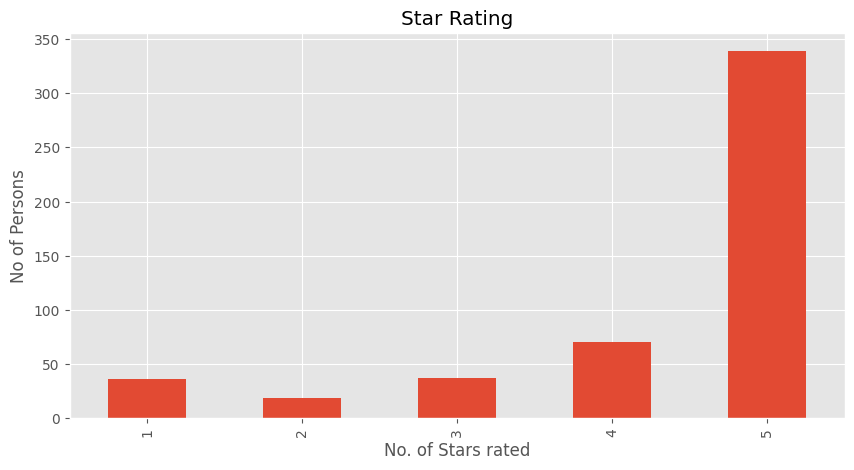

In [9]:
ax = df['Score'].value_counts().sort_index().plot(kind="bar", title="Star Rating", figsize=(10,5))
ax.set_xlabel("No. of Stars rated")
ax.set_ylabel("No of Persons")
plt.show()

# Basic NLTK 

In [10]:
review = df['Text'].values[21]
review

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
token = nltk.word_tokenize(review)
token[:10]

['I',
 'bought',
 'these',
 'for',
 'my',
 'husband',
 'who',
 'is',
 'currently',
 'overseas']

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
tag = nltk.pos_tag(token)
tag[:10]

[('I', 'PRP'),
 ('bought', 'VBD'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('husband', 'NN'),
 ('who', 'WP'),
 ('is', 'VBZ'),
 ('currently', 'RB'),
 ('overseas', 'RB')]

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [16]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()

(S
  I/PRP
  bought/VBD
  these/DT
  for/IN
  my/PRP$
  husband/NN
  who/WP
  is/VBZ
  currently/RB
  overseas/RB
  ./.
  He/PRP
  loves/VBZ
  these/DT
  ,/,
  and/CC
  apparently/RB
  his/PRP$
  staff/NN
  likes/VBZ
  them/PRP
  also./RP
  </JJ
  br/NN
  //NNP
  >/NNP
  There/EX
  are/VBP
  generous/JJ
  amounts/NNS
  of/IN
  Twizzlers/NNS
  in/IN
  each/DT
  16-ounce/JJ
  bag/NN
  ,/,
  and/CC
  this/DT
  was/VBD
  well/RB
  worth/IN
  the/DT
  price/NN
  ./.
  </VB
  a/DT
  href=/NN
  ''/''
  http/NN
  :/:
  //www.amazon.com/gp/product/B001GVISJM/NN
  ''/''
  >/NN
  Twizzlers/NNP
  ,/,
  (PERSON Strawberry/NNP)
  ,/,
  16-Ounce/NN
  (GPE Bags/NNP)
  (/(
  (ORGANIZATION Pack/NNP)
  of/IN
  6/CD
  )/)
  </NN
  /a/CD
  >/NN)


In [18]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d vader_lexicon



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

# VADER Sentiment Scoring

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer as SIA
from tqdm.notebook import tqdm
sid = SIA()

In [ ]:
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d vader_lexicon


      Package vader_lexicon is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [20]:
result = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  text = row['Text']
  myid = row['Id']
  result[myid] = sid.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how = 'left')

In [25]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


# Plotting VADER Results


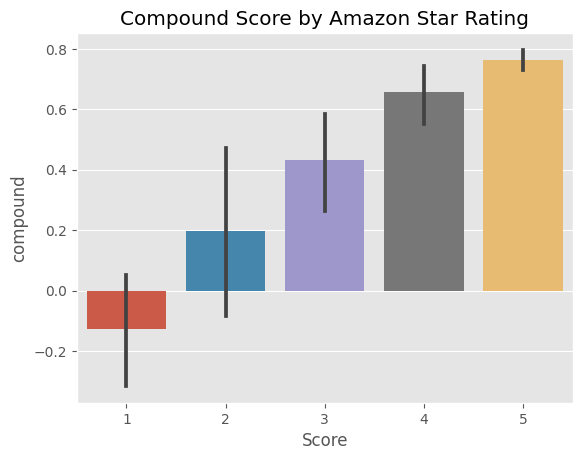

In [26]:
ax = sns.barplot(data= vaders, x='Score', y='compound')
ax.set_title("Compound Score by Amazon Star Rating")
plt.show()

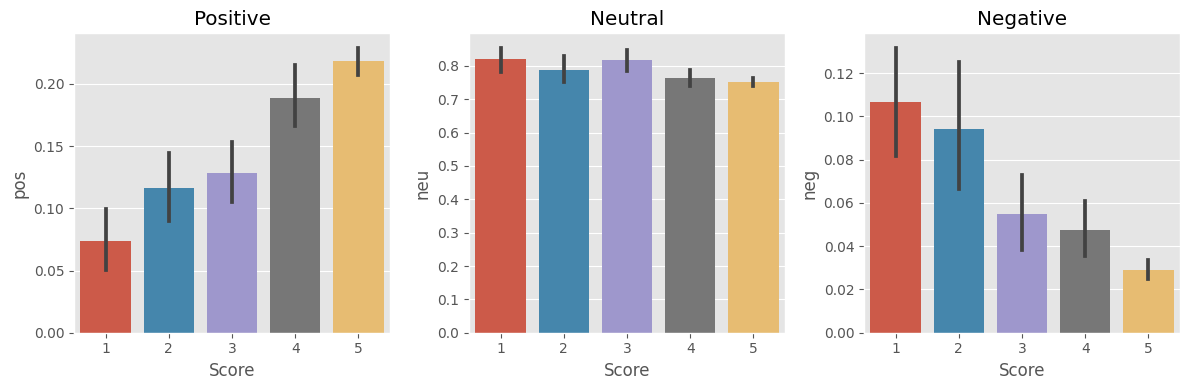

In [27]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [29]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.0 MB/s eta 0:00:00


# Roberta Pretrained Model

In [31]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [32]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [35]:
# VADER Results
print(review)
sid.polarity_scores(review)

I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>


{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9153}

In [41]:
encoded_text = tokenizer(review, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.001678396, 'roberta_neu': 0.020744005, 'roberta_pos': 0.97757757}


In [42]:
def polarity_scores_roberta(review):
    encoded_text = tokenizer(review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
       'roberta_neg' : scores[0],
       'roberta_neu' : scores[1],
       'roberta_pos' : scores[2]
    }
    return scores_dict

In [49]:
result = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try: 
     text = row['Text']
     myid = row['Id']
     vader_result = sid.polarity_scores(text)
     vader_result_rename = {}
     for key, value in vader_result.items():
         vader_result_rename[f"vader_{key}"] = value
     roberta_result = polarity_scores_roberta(text)
     both = {**vader_result, **roberta_result}
     result[myid] = both
  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [50]:
result_df = pd.DataFrame(result).T
result_df = result_df.reset_index().rename(columns = {'index': 'Id'})
result_df = result_df.merge(df, how = 'left')

# Comparing Scores between Models

In [51]:
result_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

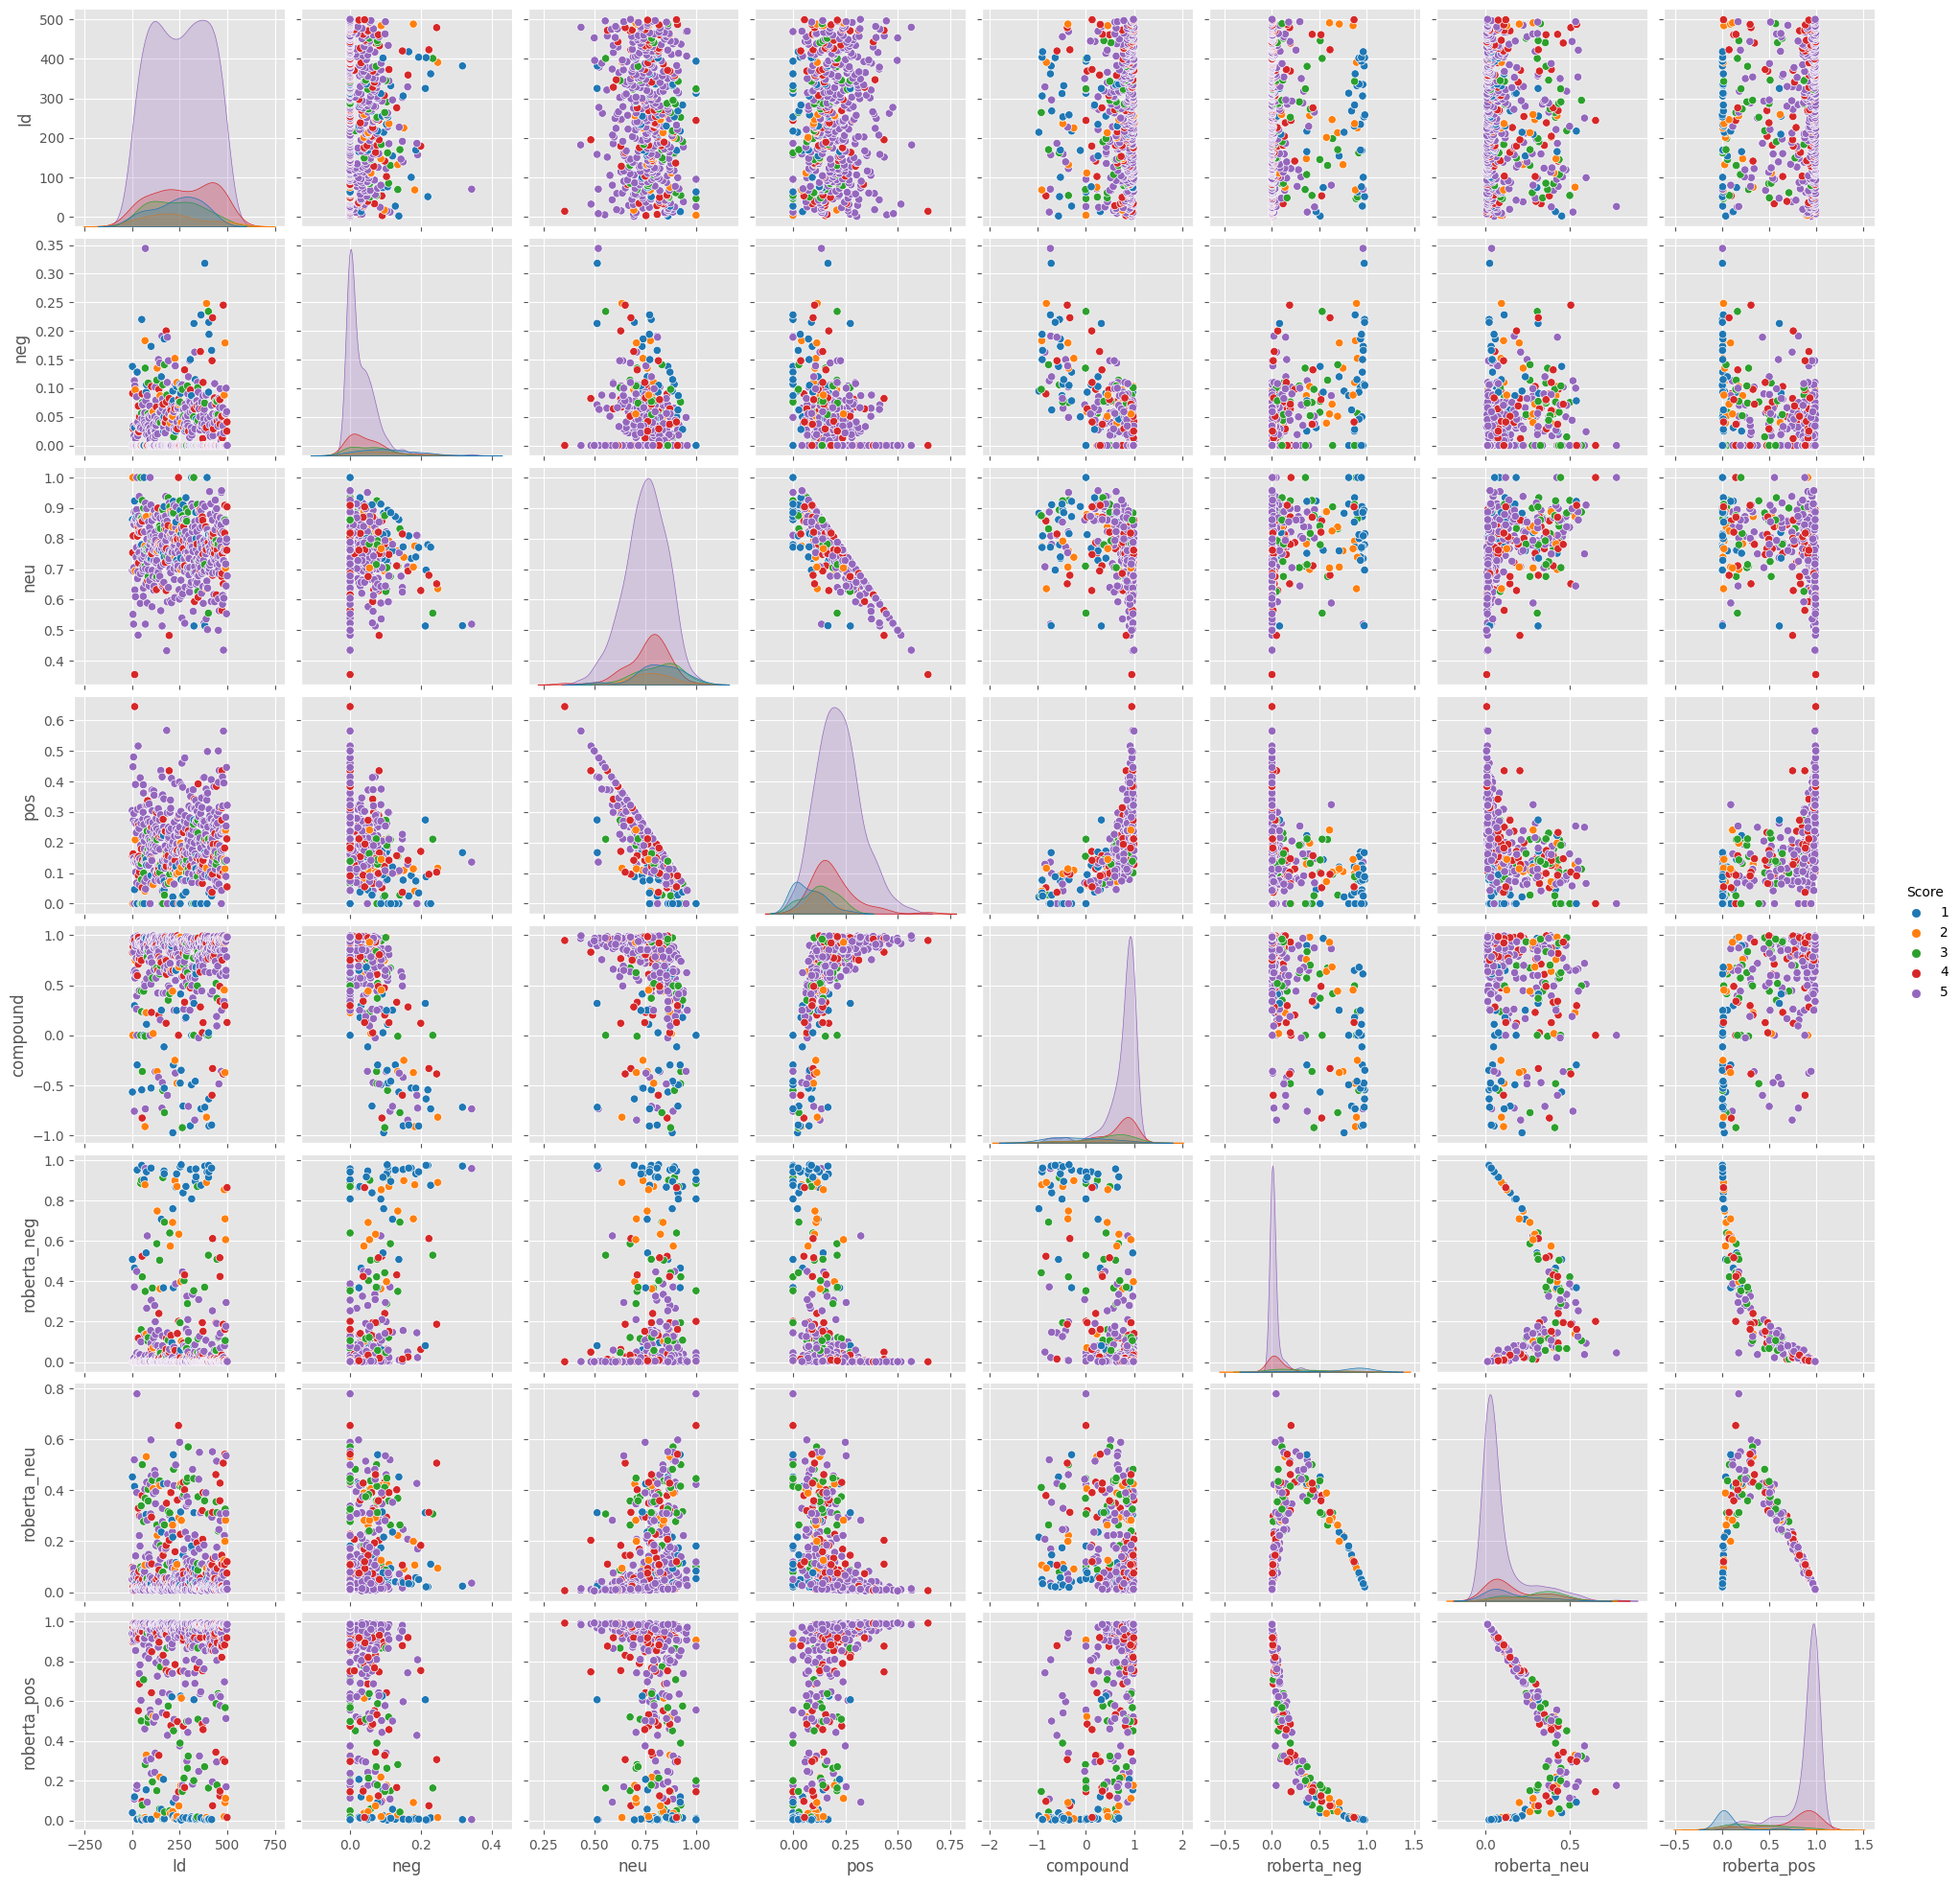

In [52]:
sns.pairplot(data= result_df, vars=['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos'], hue= 'Score', palette='tab10')
plt.show()

# Review Examples

In [55]:
result_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [56]:
result_df.query('Score == 1').sort_values('pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [58]:
# negative sentiment 5-Star review
result_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [59]:
result_df.query('Score == 5').sort_values('neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# The Transformers Pipeline

In [61]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [62]:
sent_pipeline('I love deep learning!')

[{'label': 'POSITIVE', 'score': 0.9998645782470703}]